# Linear Regression Tests

## Simple Linear Regression (One Independent Variable)

Linear regression assumes a linear or straight line relationship between the input variables ($X$)
and the single output variable ($y$). More specifically, that output ($y$) can be calculated from a
linear combination of the input variables ($X$). When there is a single input variable, the method
is referred to as a simple linear regression.

In simple linear regression we can use statistics on the training data to estimate the coefficients
required by the model to make predictions on new data. The line for a simple linear regression
model can be written as:

\begin{equation*}
y = b_0 + b_1 \times x
\end{equation*}

Where $b_0$ and $b_1$ are the coeffcients we must estimate from the training data. Once the
coefficients are known, we can use this equation to estimate output values for $y$ given new input
examples of $x$. The technique requires that you calculate statistical properties from the data such as mean,
variance and covariance.

In [1]:
# Contrived dataset
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

In [2]:
import matplotlib.pyplot as plt 
from pprint import pprint
import scipy.stats
%matplotlib inline


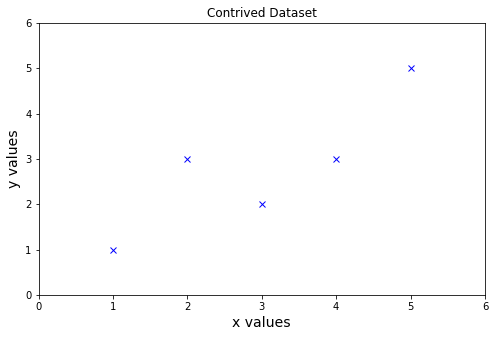

In [3]:
xs =[]
ys = []
for d in dataset:
    x = d[0]
    y = d[1]
    xs = xs + [x]
    ys = ys + [y]


plt.figure(figsize=(8,5))    
plt.axis([min(xs)-1, max(xs)+1, min(ys)-1, max(ys)+1])  
plt.title('Contrived Dataset')
plt.xlabel('x values', fontsize=14)
plt.ylabel('y values', fontsize=14)

plt.plot(xs, ys, 'bx')

plt.show()

In [4]:

# Example of Estimating Mean and Variance
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

# calculate mean and variance
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))


x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


The covariance of two groups of numbers describes how those numbers change together. Co-
variance is a generalization of correlation. Correlation describes the relationship between two
groups of numbers, whereas covariance can describe the relationship between two or more
groups of numbers. Additionally, covariance can be normalized to produce a correlation value.
Nevertheless, we can calculate the covariance between two variables as follows:
    
\begin{equation*}
    covariance = \sum_{i=1}^n \left( x_{i} - mean(x) \right) \times \left( y_{i} - mean(y) \right)
\end{equation*}
    

In [5]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar


We must estimate the values for two coefficients in simple linear regression. The first is B1 which
can be estimated as:

\begin{equation*}
    B1 = \frac{covariance(x, y)}{variance(x)}
\end{equation*}

We already have functions to calculate covariance() and variance(). Next, we need to
estimate a value for B0, also called the intercept as it controls the starting point of the line
where it intersects the y-axis.

\begin{equation*}
    B0 = mean(y) - B1 \times mean(x) 
\end{equation*}

Again, we know how to estimate B1 and we have a function to estimate mean(). We can
put all of this together into a function named coefficients() that takes the dataset as an
argument and returns the coefficients. We implement this in python as,

In [6]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

The simple linear regression model is a line defined by coefficients estimated from training data.
Once the coefficients are estimated, we can use them to make predictions.Below is a function named <tt>simple_linear_regression()</tt> that implements the prediction equation to make predictions on a test dataset. we will also add in a function to manage the evaluation of the predictions called <tt>evaluate_algorithm()</tt> and another function to estimate the Root Mean Squared Error (RMSE) of the predictions called <tt>rmse_metric()</tt>.

In [7]:
from math import sqrt

def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    # The coefficients
    print('Coefficients: b0 %.3f  b1 %.3f\n' % (b0, b1) )   
    return predictions

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    y_predicted = list()
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    y_predicted += predicted
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse, y_predicted


Finally, we can run the linear regression.

In [8]:
# Test simple linear regression
rmse, y_predicted = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

Coefficients: b0 0.400  b1 0.800

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


In [9]:
print(y_predicted)

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


[1, 2, 4, 3, 5]
[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


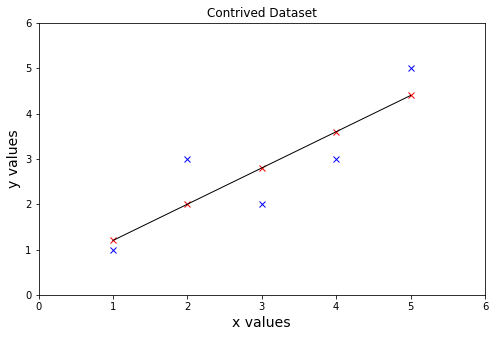

In [10]:
# Plot values
plt.figure(figsize=(8,5))    
plt.axis([min(xs)-1, max(xs)+1, min(ys)-1, max(ys)+1])  
plt.title('Contrived Dataset')
plt.xlabel('x values', fontsize=14)
plt.ylabel('y values', fontsize=14)

plt.plot(xs, ys, 'bx')
plt.plot(xs, y_predicted, 'rx')
plt.plot([xs[0], xs[-1]], [y_predicted[0], y_predicted[-1]], 'k-', lw=1)

print(xs)
print(y_predicted)

plt.show()

### Compare with Scikit Learn LinearRegression

In theory... we should be able to test our linear egression implementation with the version implemented in the excellent scikit-learn libraries. If our implementation is correct then we should get identical results, right ? Let's test it...!

In [11]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[0.8]]
Mean squared error: 0.48
Root Mean squared error: 0.69
Variance score: 0.73


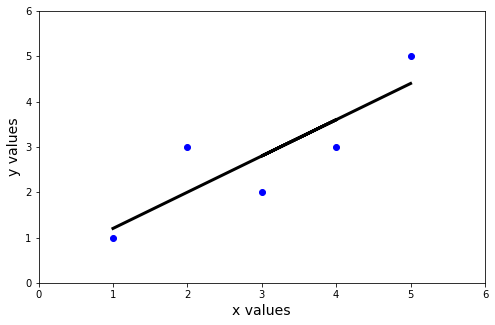

[[1]
 [2]
 [4]
 [3]
 [5]]
[[1.2]
 [2. ]
 [3.6]
 [2.8]
 [4.4]]


In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Convert dataset lists to numpy arays
xsa = np.array(xs).reshape(len(xs), 1);
ysa = np.array(ys).reshape(len(ys), 1);

# Train the model using the training sets
regr.fit(xsa, ysa)

# Make predictions using the testing set
y_pred = regr.predict(xsa)

# The coefficients and intercept
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ysa, y_pred))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(ysa, y_pred)))


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ysa, y_pred))

# Plot outputs
plt.figure(figsize=(8,5)) 
plt.axis([min(xsa)-1, max(xsa)+1, min(ysa)-1, max(ysa)+1])  
plt.scatter(xsa, ysa,  color='blue')
plt.plot(xsa, y_pred, color='black', linewidth=3)

plt.xlabel('x values', fontsize=14)
plt.ylabel('y values', fontsize=14)

plt.show()

print(xsa)
print(y_pred)

In [16]:
print("Intercept = ", regr.predict([[0]]))

Intercept =  [[0.4]]


Success! So the results of the scikit learn implementation match those of our own linear regression algorithm, thereby proving that our implementation from scratch is correct.

### Compare with Apache Spark LinearRegression

Ok. In a few words, [Apache Spark](https://spark.apache.org "Apache Spark") is a fast, scalable and powerful framework that provides an API to perform massive distributed processing and machine-learning over DataFrame-based sets of data. We are going to use the highly useful Python 'findspark' package (<tt>pip install findspark</tt>) to find Spark on my local machine and then import 'pyspark', the python interface to the core Spark API libraries, to perform our linear regression.

However, I ran into a few problems. It seems that the <tt>LinearRegression</tt> module in Spark does not return a straight-line model. Despite extensive efforts [See here](https://github.com/github9000/Experiments/blob/master/Linear_Regression_Pyspark.ipynb "See here") and [here](https://github.com/github9000/Experiments/blob/master/Linear_Regression_Pyspark_2.ipynb "here") as well as a question on [Stackoverflow](https://stackoverflow.com/questions/53012062/how-do-i-get-a-straight-line-linear-regression-result-in-pyspark "Stackoverflow") and a question to the user@spark.apache.org mailing list, I was unable to get Pyspark to return a simple straight-line model. 

If you look at the Apache Spark [LinearRegression](https://github.com/apache/spark/blob/v2.3.2/mllib/src/main/scala/org/apache/spark/mllib/regression/LinearRegression.scala "LinearRegression") source code, you will see that it does not actually define any class called <tt>LinearRegression</tt>. In fact, a look at the [Spark documentation](https://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.mllib.regression.package "Spark documentation") reveals that there is no <tt>LinearRegression</tt> class defined at all in Spark and the algorithm seems to be implemented in the more general <tt>GeneralizedLinearModel</tt> ([GLM](https://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.mllib.regression.GeneralizedLinearAlgorithm "GLM")) class. Upon further investigation a <tt>LinearRegression</tt> class can be found defined in PySpark [here](http://spark.apache.org/docs/2.3.2/api/python/_modules/pyspark/ml/regression.html "here"). This seemsto use a <tt>org.apache.spark.ml.regression.LinearRegression</tt> Java object which (I think) in the underlying Scala code defaults to a <tt>GeneralizedLinearModel</tt>. This may explain why a straight-line model is not returned.   
    

### Compare with Linear Regression using Keras

In [18]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
from tensorflow.python.eager.context import context, EAGER_MODE, GRAPH_MODE

# Useful Tensorflow utility function
def switch_to(mode):
    ctx = context()._eager_context
    ctx.mode = mode
    ctx.is_eager = mode == EAGER_MODE

switch_to(EAGER_MODE)
assert tf.executing_eagerly()
v = tfe.Variable(3.0)
print(v.numpy())
#assert tf.get_default_graph().get_operations() == []

switch_to(GRAPH_MODE)
assert not tf.executing_eagerly()
v = tfe.Variable(3.0)
init = tf.global_variables_initializer()
assert len(tf.get_default_graph().get_operations()) > 0
with tf.Session():
    init.run()
    print(v.eval())

3.0
3.0


Using TensorFlow backend.


Epoch 1/10
5/5 [==============================] - 1s 209ms/step - loss: 10.0971
Epoch 2/10
5/5 [==============================] - 0s 999us/step - loss: 1.0096
Epoch 3/10
5/5 [==============================] - 0s 800us/step - loss: 0.6224
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6175
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6204
Epoch 6/10
5/5 [==============================] - 0s 999us/step - loss: 0.6212
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6213
Epoch 8/10
5/5 [==============================] - 0s 999us/step - loss: 0.6213
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6213
Epoch 10/10
5/5 [==============================] - 0s 999us/step - loss: 0.6212


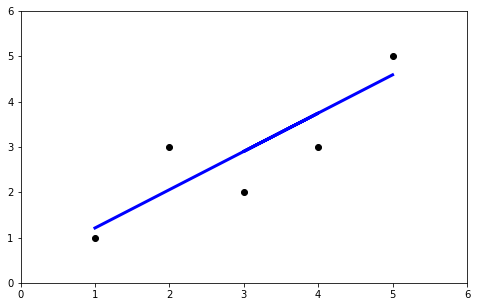

In [19]:

import keras
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

from matplotlib import pyplot as plt


switch_to(GRAPH_MODE)


## create dataset for regression
def make_data():
    # Contrived dataset
    dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
    xs =[]
    ys = []
    for d in dataset:
        x = float(d[0])
        y = float(d[1])
        xs = xs + [x]
        ys = ys + [y]
    return np.array(xs), np.array(ys)

xs, ys = make_data()

inputs = Input(shape=(1,))
preds = Dense(1, activation='linear')(inputs)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='mse')
history = model.fit(xs, ys, batch_size=1, verbose=1, epochs=10, shuffle=False)

# Plot outputs
plt.figure(figsize=(8,5)) 
plt.axis([min(xsa)-1, max(xsa)+1, min(ysa)-1, max(ysa)+1])  
plt.scatter(xs, ys, color='black')
plt.plot(xs, model.predict(xs), color='blue', linewidth=3)
plt.show()


In [20]:
model.predict([0.0])

array([[0.36486247]], dtype=float32)

In [21]:
model.get_weights()

[array([[0.8452245]], dtype=float32), array([0.36486247], dtype=float32)]

{'batch_size': 1, 'epochs': 10, 'steps': None, 'samples': 5, 'verbose': 1, 'do_validation': False, 'metrics': ['loss']}


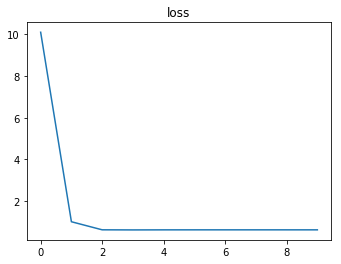

In [26]:

print(history.params)

plt.figure(figsize=(12,4))
hist = history.history
plt.subplot(121)
plt.plot(hist['loss'])
plt.title('loss')
#plt.subplot(122)
#plt.plot(hist['mse'])
#plt.title('metric')
pass

### Compare with  Linear Regression using Tensorflow (Eager execution)

Initial cost= 45.060798645 W= -1.9514023 b= 0.022801235
Epoch: 0001 cost= 35.085254669 W= -1.6374321 b= 0.109115295
Epoch: 0100 cost= 0.248290926 W= 0.7163891 b= 0.70182663
Epoch: 0200 cost= 0.245910794 W= 0.72941095 b= 0.6548488
Epoch: 0300 cost= 0.244213969 W= 0.7403984 b= 0.61518085
Epoch: 0400 cost= 0.243004248 W= 0.7496755 b= 0.58168757
Epoch: 0500 cost= 0.242141798 W= 0.7575085 b= 0.55340743
Epoch: 0600 cost= 0.241526932 W= 0.7641225 b= 0.52952904
Epoch: 0700 cost= 0.241088584 W= 0.76970696 b= 0.5093677
Epoch: 0800 cost= 0.240776017 W= 0.7744221 b= 0.49234444
Epoch: 0900 cost= 0.240553260 W= 0.77840334 b= 0.47797087
Epoch: 1000 cost= 0.240394399 W= 0.7817649 b= 0.46583462


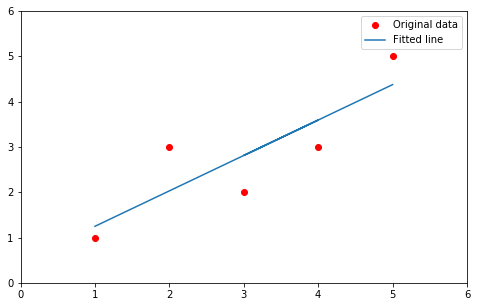

In [27]:
''' Linear Regression with Eager API.

A linear regression learning algorithm example using TensorFlow's Eager API.

'''
from __future__ import absolute_import, division, print_function


switch_to(EAGER_MODE)

    
train_X = xs
train_Y = ys
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())


# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b


# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)


# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

        
# Graphic display
plt.figure(figsize=(8,5)) 
plt.axis([min(xsa)-1, max(xsa)+1, min(ysa)-1, max(ysa)+1])  
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()


In [28]:
print("W = ", W, " b = ", b)

W =  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7817649>  b =  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.46583462>


### Summary